### Thresholding 

This script attempts to find an optimal threshold to split classes of the rationality measures:
1. *Rationality:* FK score, IC Score and formality score
2. *Incivility*: All dictionaries

In [ ]:
#import core libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import test set data

results_all = pd.read_csv(r"~\Downloads\Data_combination_test.csv")

results_all_rationality = results_all[['ID','commentText','RATIONALITY_DUMMY','IC_score_per','FK_SCORE','formality']]

### Rationality
The following section will try to find an optimal artificial categorisation for FK score, IC score and formality, including

1. Mean split
2. Median split
3. Quantile split (unfinished)
4. Theoretical split (predefined by measurement authors)

In [ ]:
#Data summary
results_all_rationality.describe()

,RATIONALITY_DUMMY,IC_score_per,FK_SCORE,formality
count,773.000000,773.000000,773.000000,773.000000
mean,0.208279,0.255604,73.851164,57.724899
std,0.406341,1.036037,32.276332,17.897586
min,0.000000,-6.808824,-228.190000,0.000000
25%,0.000000,0.000000,61.500000,47.777778
50%,0.000000,0.250000,77.910000,56.666667
75%,0.000000,0.500000,92.320000,66.666667
max,1.000000,7.258427,121.220000,100.000000


In [ ]:
#Mean and median split
def m_splitting(measures, FK = False):
    if FK == False:
        mean_s = measures.apply(lambda x: 1 if x >= measures.mean() else 0)
        medi_s = measures.apply(lambda x: 1 if x >= measures.median() else 0)
    else:
        mean_s = measures.apply(lambda x: 1 if x <= measures.mean() else 0)
        medi_s = measures.apply(lambda x: 1 if x <= measures.median() else 0)

    return mean_s, medi_s

results_all_rationality['IC_mean'],results_all_rationality['IC_median'] = m_splitting(results_all_rationality['IC_score_per'])
results_all_rationality['Formality_mean'],results_all_rationality['Formality_median'] = m_splitting(results_all_rationality['formality'])
results_all_rationality['FK_mean'],results_all_rationality['FK_median'] = m_splitting(results_all_rationality['FK_SCORE'], FK = True)

C:\Users\shrim\AppData\Local\Temp/ipykernel_22464/495850740.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_all_rationality['IC_mean'],results_all_rationality['IC_median'] = m_splitting(results_all_rationality['IC_score_per'])
C:\Users\shrim\AppData\Local\Temp/ipykernel_22464/495850740.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_all_rationality['Formality_mean'],results_all_rationality['Formality_median'] = m_splitting(results_all_rationality['formality'])
C:\Users\shrim\AppDat

In [ ]:
#Theoretical split
results_all_rationality['Formality_theoretical'] = results_all_rationality['formality'].apply(lambda x: 1 if x > 65 else 0)
results_all_rationality['FK_theoretical'] = results_all_rationality['FK_SCORE'].apply(lambda x: 1 if x <= 60 else 0)

C:\Users\shrim\AppData\Local\Temp/ipykernel_22464/1675475000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_all_rationality['Formality_theoretical'] = results_all_rationality['formality'].apply(lambda x: 1 if x > 65 else 0)
C:\Users\shrim\AppData\Local\Temp/ipykernel_22464/1675475000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_all_rationality['FK_theoretical'] = results_all_rationality['FK_SCORE'].apply(lambda x: 1 if x <= 60 else 0)


In [ ]:
#Quantile split
def q_splitting(measures):
    quantile_25 = measures.apply(lambda x: 1 if x >= measures.quantile(0.25) else 0)
    quantile_50 = measures.apply(lambda x: 1 if x >= measures.quantile(0.50) else 0)
    quantile_75 = measures.apply(lambda x: 1 if x >= measures.quantile(0.75) else 0)
    quantile_90 = measures.apply(lambda x: 1 if x >= measures.quantile(0.90) else 0)
    quantile_99 = measures.apply(lambda x: 1 if x >= measures.quantile(0.99) else 0)


    return quantile_25, quantile_50, quantile_75, quantile_90, quantile_99
    

q_splitting(results_all_rationality['FK_SCORE'])

(0      0
 1      1
 2      0
 3      1
 4      1
       ..
 768    0
 769    0
 770    1
 771    1
 772    0
 Name: FK_SCORE, Length: 773, dtype: int64,
 0      0
 1      1
 2      0
 3      1
 4      1
       ..
 768    0
 769    0
 770    1
 771    1
 772    0
 Name: FK_SCORE, Length: 773, dtype: int64,
 0      0
 1      0
 2      0
 3      1
 4      0
       ..
 768    0
 769    0
 770    0
 771    1
 772    0
 Name: FK_SCORE, Length: 773, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 768    0
 769    0
 770    0
 771    1
 772    0
 Name: FK_SCORE, Length: 773, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 768    0
 769    0
 770    0
 771    0
 772    0
 Name: FK_SCORE, Length: 773, dtype: int64)

<AxesSubplot: title={'center': 'Correlation between different splitting methods for rationality'}>

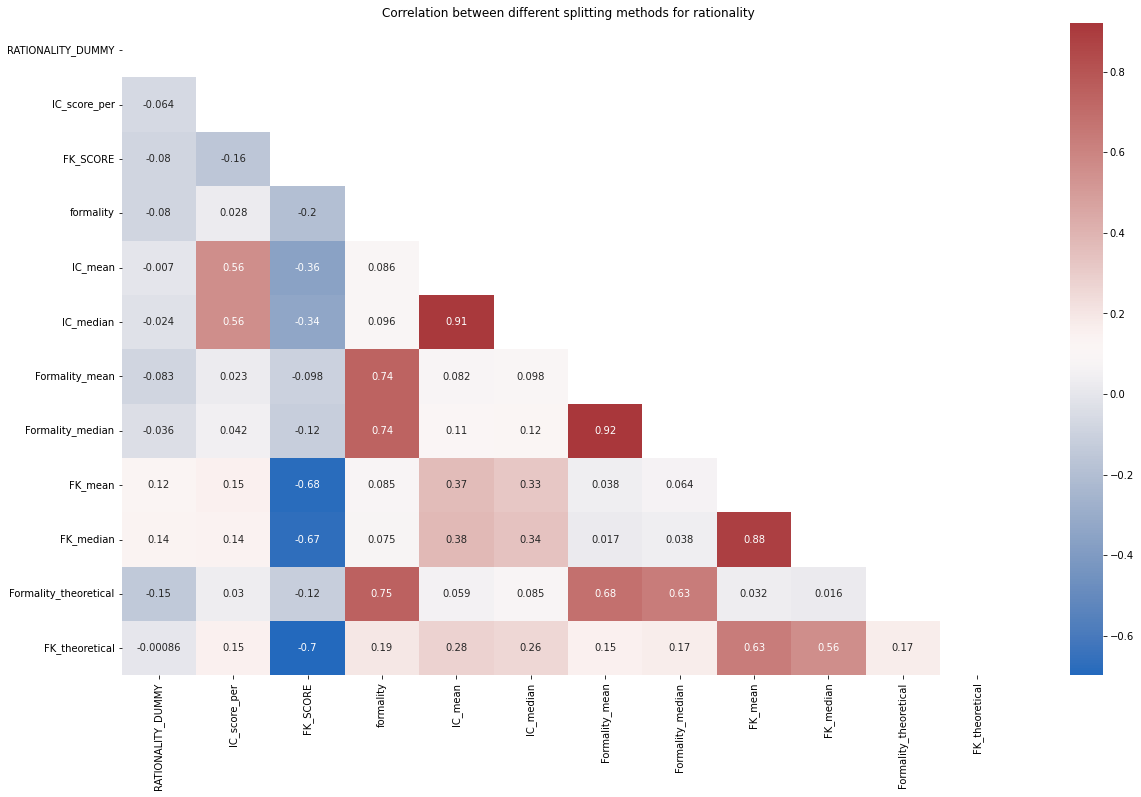

In [ ]:
#plot heatmap corr
plt.figure(figsize=(20, 12))
plt.title("Correlation between different splitting methods for rationality")

sns.heatmap(results_all_rationality.corr(), mask = np.triu(results_all_rationality.corr()), annot=True, cmap='vlag')

In [ ]:
import sklearn.metrics

def report_making(measures):
    y_true = results_all_rationality['RATIONALITY_DUMMY']

    print(sklearn.metrics.classification_report(y_true = y_true, y_pred = measures))

def loop_report(measures):
    for n_measure, measure in measures.items():
        print(f"---------Classification Report for: {n_measure}---------\n ")
        report_making(measure)

measures = {'FK_mean':results_all_rationality['FK_mean'],'FK_median':results_all_rationality['FK_median'],
'FK_theoretical': results_all_rationality['FK_theoretical'],'IC_mean': results_all_rationality['IC_mean'],'IC_median': results_all_rationality['IC_median'], 
'Formality_mean': results_all_rationality['Formality_mean'],'Formality median': results_all_rationality['Formality_median'],'Formality theoretical':results_all_rationality['Formality_theoretical']}

loop_report(measures)

---------Classification Report for: FK_mean---------
 
              precision    recall  f1-score   support

           0       0.84      0.59      0.69       612
           1       0.27      0.56      0.36       161

    accuracy                           0.59       773
   macro avg       0.55      0.58      0.53       773
weighted avg       0.72      0.59      0.62       773

---------Classification Report for: FK_median---------
 
              precision    recall  f1-score   support

           0       0.85      0.54      0.66       612
           1       0.27      0.64      0.38       161

    accuracy                           0.56       773
   macro avg       0.56      0.59      0.52       773
weighted avg       0.73      0.56      0.60       773

---------Classification Report for: FK_theoretical---------
 
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       612
           1       0.21      0.24      0.22       161

    accu

### Incivilty

The following section will try to find an optimal threshold for classifying presence or absence of incivility in a certain comment using MCC.

Formula of MCC is as follow:

$\frac{TP  \times TN - FP \times FN}{ \sqrt{(TP+FP) \times (TP+FN) \times (TN+FP) \times (TN+FN)} }$

It is exactly the same as Pearson's coefficient but used as a biserial correlation. 

The advantage of using MCC:
1. Will not be affected by unbalanced dataset as F1 and accuracy do (to get a high quality score, the classifier has to make correct predictions both on the majority of the negative cases, and on the majority of the positive cases, independently of their ratios in the overall dataset, Chicco & Jurman, 2020)
2. Usually positively correlated also to F1 and accuracy

In [ ]:
#import test set data

results_all = pd.read_csv(r"~\Downloads\Data_combination_test.csv")

results_all_incivility = results_all[['ID','commentText','Dict_Hostility_Ksiazek_2015','Dict_Civility_Ksiazek_2015','Dict_GoogeProject_OffensiveWords','Dict_Incivility_Muddiman','Dict_Swearwords_LIWC','Dict_HatebaseVocabEN',
'NAMECALLING_VULGAR_DUMMY','INTOLERANCE_DUMMY','IMPOLITENESS_DUMMY', 'INCIVILITY_DUMMY', 'VULGAR_DUMMY','NAMECALLING_DUMMY']]

In [ ]:
#function to test threshold

dict_incv_count = results_all_incivility.iloc[:,[2,4,5,6,7,8]].apply(lambda row: row.sum(), axis = 1) #summing rows (civility dict is taken out as it is negatively correlated)

def threshold_loop(measures):
    df_threshold = pd.DataFrame(columns = ['Incivility class','Threshold']) #create df for storing presence / absence
    temp_df = pd.DataFrame() #create temporary df for appending 

    for threshold in range(1,6,1): #loop within the 6 dicts
            incivility_class = measures.apply(lambda x: 1 if x >= threshold else 0) #classify based on number of threshold

            temp_df['Incivility class'] = incivility_class #store class
            temp_df['Threshold'] = threshold #store threshold value

            df_threshold = pd.concat([df_threshold, temp_df]) #concat dataframes

    return df_threshold 

Incivility_class_by_threshold = threshold_loop(dict_incv_count)

In [ ]:
#function to calculate correlations of different threshold

def threshold_corr(measures, dictn = ''):
    thres_corr = pd.DataFrame(columns = ['Threshold','Correlation','Dict']) #list to store correlation coefficients

    for threshold in range(1,6,1):
        incivil_level = Incivility_class_by_threshold[Incivility_class_by_threshold['Threshold'] == threshold]['Incivility class'].astype('int64') #check incivility class given a threshold level

        corr_coef = np.corrcoef(measures, incivil_level)[0][1] #pass correlation coefficient

        thres_corr = thres_corr.append({'Correlation': corr_coef,'Threshold':threshold, 'Dict': dictn}, ignore_index=True)

        print(corr_coef)

    return thres_corr


In [ ]:
#create dict for loop
dicts = {'NAMECALLING_VULGAR_DUMMY':results_all_incivility['NAMECALLING_VULGAR_DUMMY'],'INTOLERANCE_DUMMY Words':results_all_incivility['INTOLERANCE_DUMMY'],'IMPOLITENESS_DUMMY':results_all_incivility['IMPOLITENESS_DUMMY'],
'INCIVILITY_DUMMY':results_all_incivility['INCIVILITY_DUMMY'],'VULGAR_DUMMY':results_all_incivility['VULGAR_DUMMY'],'NAMECALLING_DUMMY':results_all_incivility['VULGAR_DUMMY']}

thres_corr = pd.DataFrame(columns = ['Threshold','Correlation','Dict']) #df to store correlation coefficients

for var_name, var in dicts.items(): #get variable (as df) and variable name (as string)
    temp_df = threshold_corr(var, var_name) #pass each loop of threshold corr to temp_Df

    thres_corr = thres_corr.append(temp_df) #update thres_corr df

0.5532248557118293
0.6512718677075663
0.5499390947967353
0.5697940756621526
0.28822062086987504
0.11025557228306572
0.16101360894325878
0.12606495797602374
0.1816173340348946
0.17297501833037285
0.4235190171339852
0.4209249753069696
0.32748212106560254
0.29745594888927634
0.13965180913301767
0.4185180564378571
0.42084558371578207
0.3180727831380098
0.2903869179143556
0.1360409822288071
0.4056298284218625
0.5716678963964233
0.6239454509644472
0.6899453176122292
0.31162228683475607
0.4056298284218625
0.5716678963964233
0.6239454509644472
0.6899453176122292
0.31162228683475607


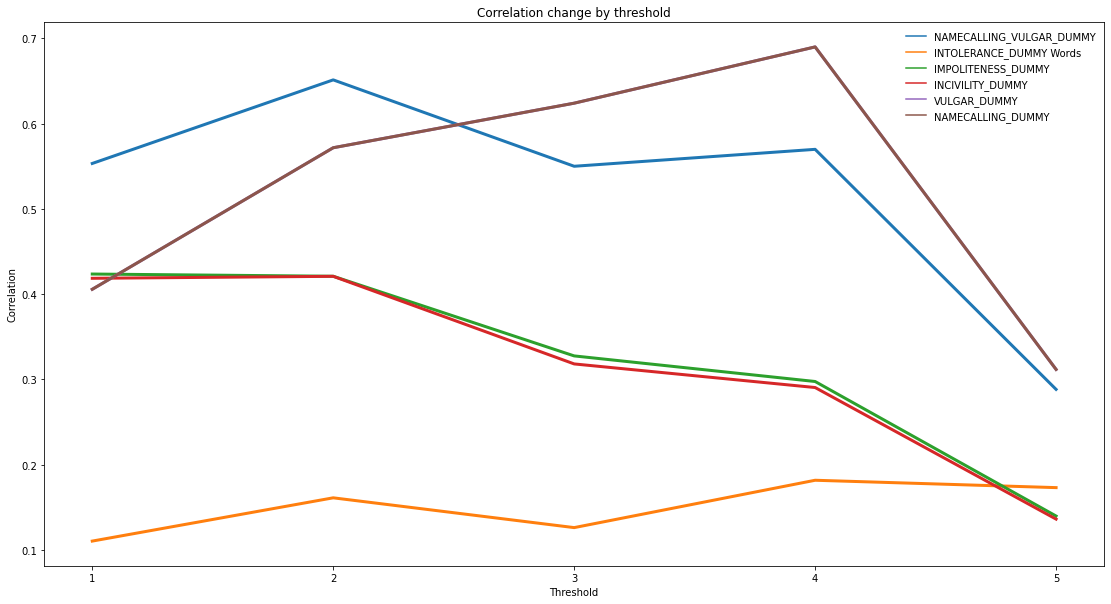

In [ ]:
#plot line graph for correlations

plt.figure(figsize = (19,10))
plt.title('Correlation change by threshold')
plt.xticks(np.arange(1,6,1))

sns.lineplot(x = thres_corr['Threshold'], y = thres_corr['Correlation'], hue = thres_corr['Dict'], linewidth = 3)
plt.legend(loc='upper right', frameon=False)